In [138]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sea
import math

<h1> Understanding the Data </h1>

In [139]:
banks = pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Data Science resources/Project/Spam/Churn_Modelling.csv")
banks.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [140]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [141]:
banks.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [142]:
banks.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


<h1> Data Distribution of categorical and numerical variables </h1>

<Axes: xlabel='Exited', ylabel='count'>

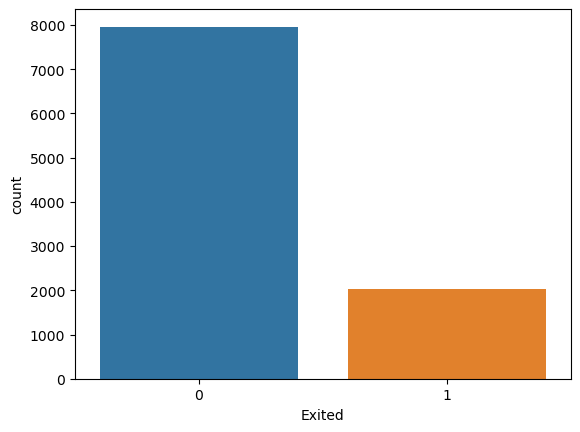

In [143]:
import seaborn as sns

sns.countplot(x = 'Exited', data = banks)

<Axes: xlabel='IsActiveMember', ylabel='count'>

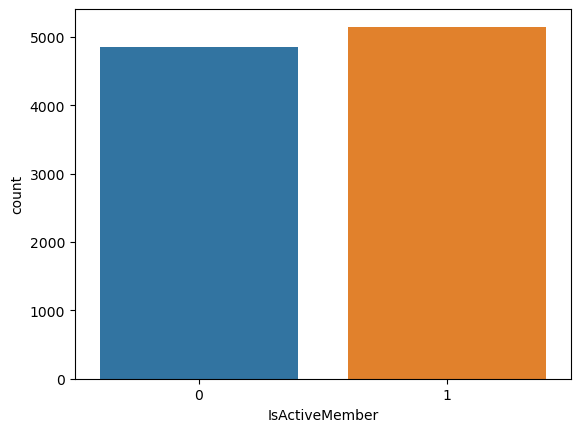

In [144]:
sns.countplot(x = 'IsActiveMember', data = banks)

<Axes: xlabel='HasCrCard', ylabel='count'>

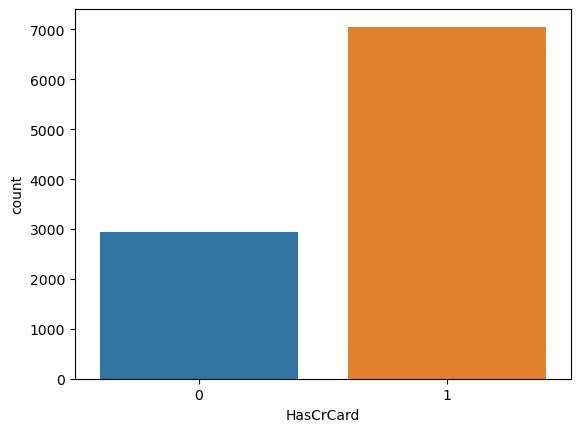

In [145]:
sns.countplot(x = 'HasCrCard', data = banks)

<Axes: xlabel='Gender', ylabel='count'>

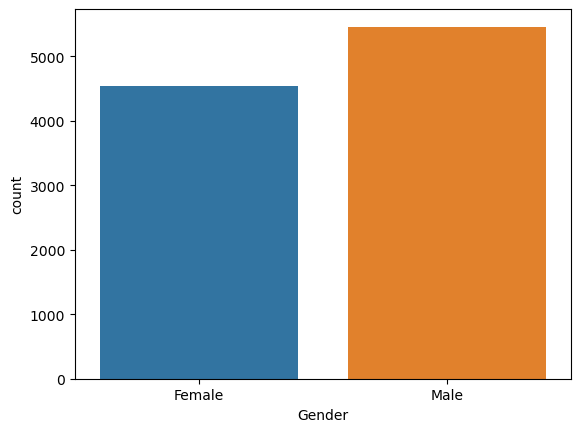

In [146]:
sns.countplot(x = 'Gender', data = banks)

<Axes: xlabel='Geography', ylabel='count'>

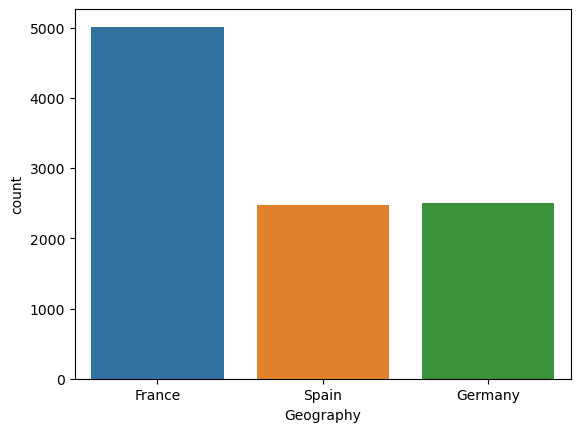

In [147]:
sns.countplot(x = 'Geography', data = banks)

In [148]:
banks.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

<Axes: xlabel='Tenure', ylabel='count'>

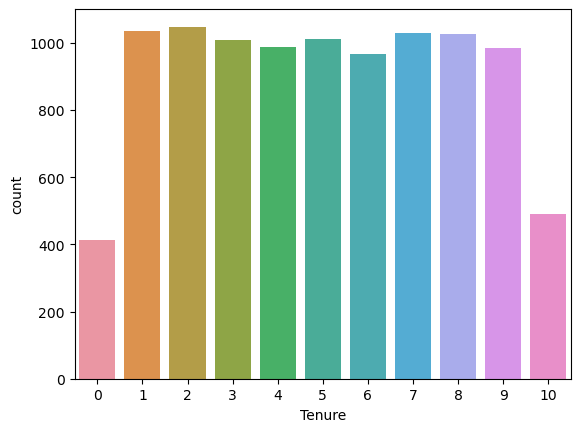

In [149]:
sns.countplot(x = 'Tenure', data = banks)

<Axes: xlabel='NumOfProducts', ylabel='count'>

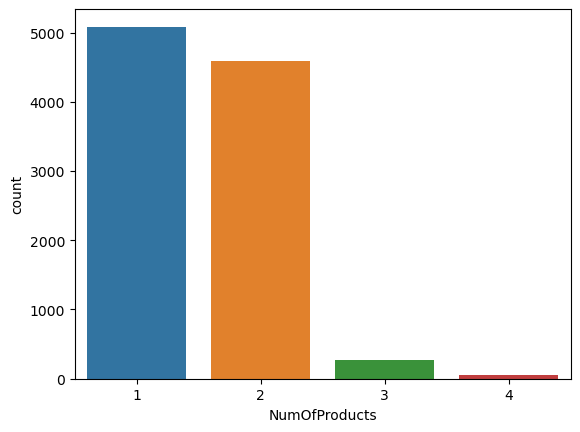

In [150]:
sns.countplot(x = 'NumOfProducts', data = banks)

<h1> transforming categorical variable to numerical </h1>

In [151]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
banks['Geography'] = label_encoder.fit_transform(banks['Geography'])
banks.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,Female,43,2,125510.82,1,1,1,79084.10,0


In [152]:
banks['Gender'] = label_encoder.fit_transform(banks['Gender'])
banks.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [153]:
# banks.drop(['Geography_encoded'], axis = 1)

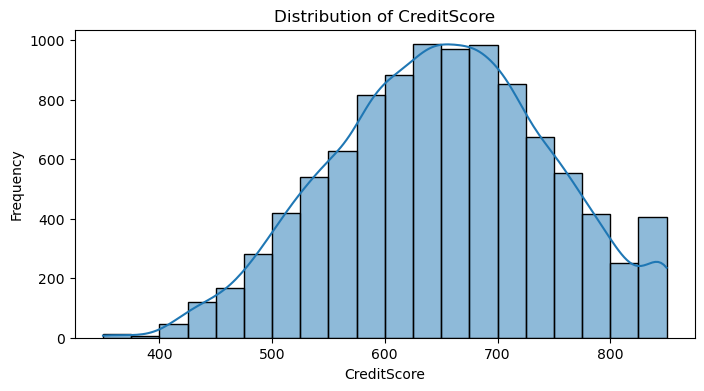

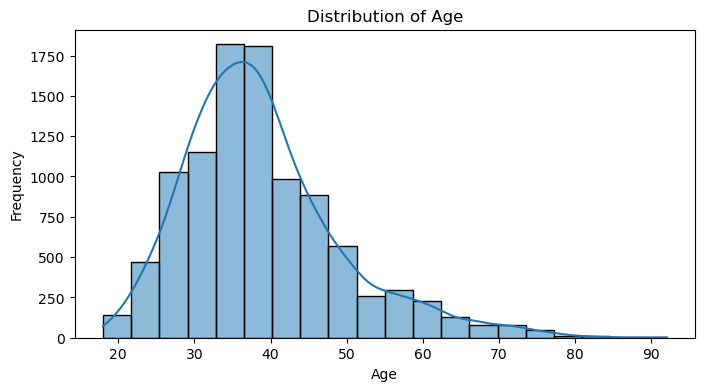

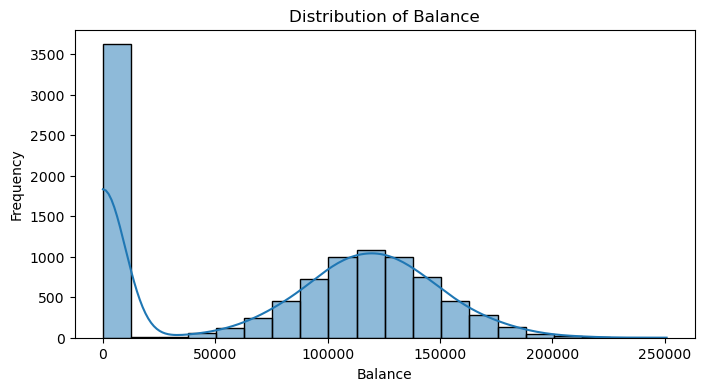

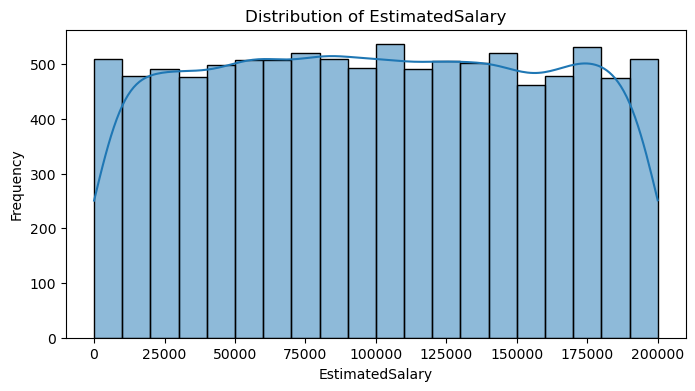

In [154]:
import matplotlib.pyplot as plt
col_dis = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
for col in col_dis:
    plt.figure(figsize=(8, 4))
    sns.histplot(banks[col], bins = 20, kde = True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()          
    

<h1> Feature selection </h1>

<h2> Using : Pearson Correlation Matrix and Information Gain </h2>

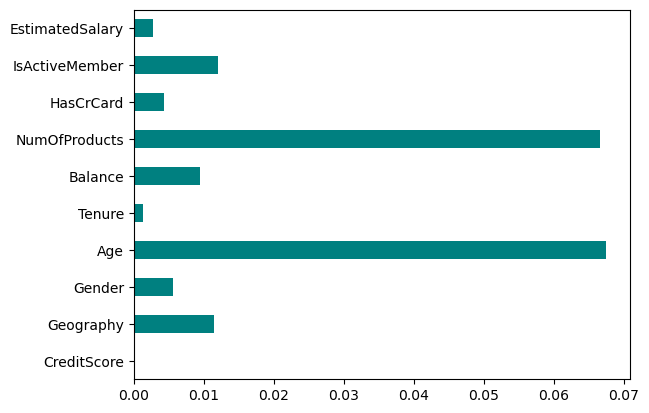

In [155]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline
x = banks.drop(['RowNumber','CustomerId','Surname', 'Exited'], axis = 1)
y = banks['Exited']
importance = mutual_info_classif(x,y)
feat_imp = pd.Series(importance, banks.columns[3:len(banks.columns)-1])
feat_imp.plot(kind = 'barh', color = 'teal')
plt.show()

In [156]:
correlation_matrix = x.corr()

selected_features = correlation_matrix.iloc[:, 0].sort_values(ascending=False)[:6]

print(selected_features)

CreditScore       1.000000
IsActiveMember    0.025651
NumOfProducts     0.012238
Geography         0.007888
Balance           0.006268
Tenure            0.000842
Name: CreditScore, dtype: float64


# Data Modeling

In [157]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [158]:
features = banks[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
target = banks['Exited']


In [159]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size = 0.20 , random_state = 42)

In [160]:
kf = KFold(n_splits = 5)
model = LogisticRegression()
scores = []

for train_index, test_index in kf.split(features):
    model.fit(features.iloc[train_index], target.iloc[train_index])
    scores.append(model.score(features.iloc[test_index], target.iloc[test_index]))
print(np.mean(scores))    
    

0.7901999999999999


In [161]:
model.fit(features, target)
print(model.score(features, target))

0.7898


In [162]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(features, target)
print(dt.score(features, target))

1.0


In [163]:
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits = 5)
model = RandomForestClassifier()
scores = []

for train_index, test_index in kf.split(features):
    model.fit(features.iloc[train_index], target.iloc[train_index])
    scores.append(model.score(features.iloc[test_index], target.iloc[test_index]))
print(np.mean(scores))    
    

0.8603999999999999


In [164]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(features, target)
print(rfc.score(features, target))

1.0


# Let's see now after spliting the data 

Mean Cross-Validation Score: 0.78775


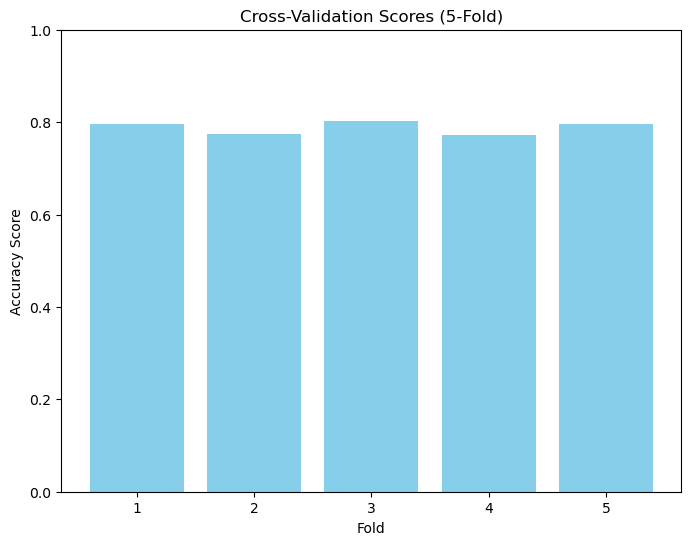

In [165]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Initialize KFold with 5 splits
kf = KFold(n_splits=5)

# Create the logistic regression model
model = LogisticRegression()

# Perform k-fold cross-validation
scores = []
for train_index, test_index in kf.split(xtrain):
    model.fit(xtrain.iloc[train_index], ytrain.iloc[train_index])
    scores.append(model.score(xtrain.iloc[test_index], ytrain.iloc[test_index]))

# Calculate the mean of the scores
mean_score = np.mean(scores)
print("Mean Cross-Validation Score:", mean_score)

# Create a bar plot to visualize the cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Scores (5-Fold)')
plt.xticks(range(1, 6))
plt.ylim(0, 1)  # Set the y-axis limits to be between 0 and 1 for accuracy
plt.show()


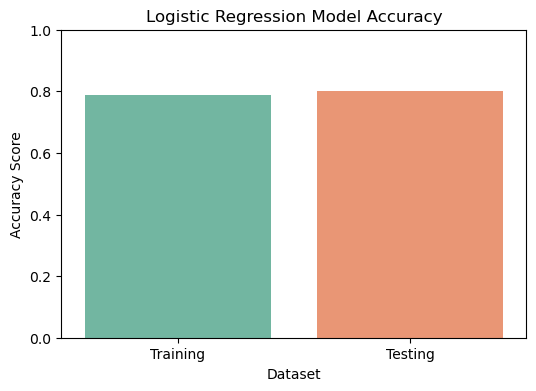

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(xtrain, ytrain)

# Calculate training and testing scores
training_score = model.score(xtrain, ytrain)
testing_score = model.score(xtest, ytest)

# Create a DataFrame for the scores
import pandas as pd
data = pd.DataFrame({'Dataset': ['Training', 'Testing'], 'Accuracy Score': [training_score, testing_score]})

# Create a bar plot using Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x='Dataset', y='Accuracy Score', data=data, palette='Set2')
plt.ylim(0, 1)  # Set the y-axis limits to be between 0 and 1 for accuracy
plt.title('Logistic Regression Model Accuracy')
plt.show()


In [167]:
# DESCISION TREE
dt.fit(xtrain, ytrain)
print('training score ', dt.score(xtrain, ytrain))
print('testing score ', dt.score(xtest, ytest))

training score  1.0
testing score  0.7835


In [168]:
#RANDOM FOREST
rfc.fit(xtrain, ytrain)
print('training score ', rfc.score(xtrain, ytrain))
print('testing score ', rfc.score(xtest, ytest))


training score  1.0
testing score  0.8705


In [169]:
k_score = []
from sklearn.neighbors import KNeighborsClassifier
for i in range (1, 11):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(xtrain, ytrain)
    k_score.append(kn.score(xtest, ytest))
    print('values for K = ', i)
    print('training score -> ', kn.score(xtrain, ytrain))
    print('testing score -> ', kn.score(xtest, ytest))
    print(" ")

print('training score ', kn.score(xtrain, ytrain))
print('testing score ', kn.score(xtest, ytest))


values for K =  1
training score ->  1.0
testing score ->  0.6865
 
values for K =  2
training score ->  0.8385
testing score ->  0.782
 
values for K =  3
training score ->  0.841875
testing score ->  0.739
 
values for K =  4
training score ->  0.8135
testing score ->  0.7855
 
values for K =  5
training score ->  0.8155
testing score ->  0.764
 
values for K =  6
training score ->  0.80725
testing score ->  0.792
 
values for K =  7
training score ->  0.805625
testing score ->  0.777
 
values for K =  8
training score ->  0.800875
testing score ->  0.796
 
values for K =  9
training score ->  0.79975
testing score ->  0.786
 
values for K =  10
training score ->  0.798125
testing score ->  0.798
 
training score  0.798125
testing score  0.798


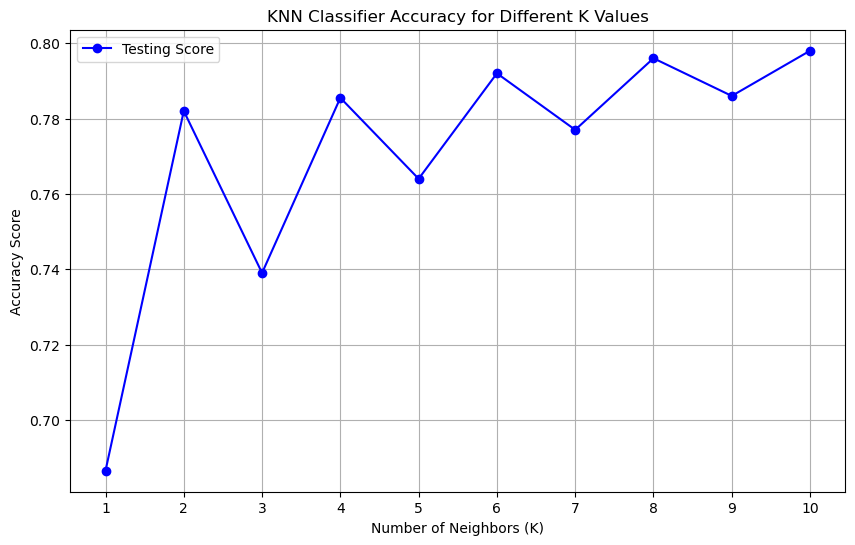

In [170]:
# Values for K (n_neighbors)
k_values = list(range(1, 11))
plt.figure(figsize=(10, 6))
plt.plot(k_values, k_score, marker='o', linestyle='-', color='b', label='Testing Score')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy Score')
plt.title('KNN Classifier Accuracy for Different K Values')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()
